###                                             Internshala Machine Learning with Python Project

* Mansi Garg
* Data Science PGC
* gargmansi1712@gmail.com

### Views about the problem statement
#### Company Background
TechWorks Consulting is a consulting firm that specializes in offering top-tier IT talent to a wide range of industries. The organization is well-known for its ability to rapidly and efficiently identify and employ highly talented IT experts in a variety of roles. TechWorks Consulting takes a unique approach to recruiting and placing IT experts. They have a big and continually growing database of qualified individuals, which they have accumulated through networking, referrals, and targeted recruiting initiatives. They also employ a staff of seasoned recruiters that are skilled at discovering the top applicants for every specific role.
#### Problem Statement
* Create a machine learning model that will assist the organization in determining the salaries of newly hired staff based on the provided data. 
* Dataset have been provided to use consisting of relevant information which is necessary to perform regression in order to estimate salary of newly appointed staff.
* Tasks performed in this whole process involves cleaning, pre-processing the data like finding outliers, treating missing values and understanding the correlation among the variables.
* Next step is to build regression models using various techniques like Linear Regression, Ridge, Lasso etc and finding out the best suited model by checking the accuracy of models by using methods like accuracy score, r2 score, MSE.

### Solution Approach: Steps towards building Salary Prediction Model
#### Understanding Dataset
* Downloading the given data set having historical data regarding the project and further support documents(city and college files) and understanding the data thoroughly.
#### Data pre-processing
* After thoroughly going through the data, first we need to find out the outliers and treating them (if any) with capping and flooring method.
* Next is finding the missing values and treating them by replacing them with mean values of respected variable. Both these steps can be seen using describe function.
* Creating numerical data for categorical data by using get_dummies for data set to perform the regression.
* Creating a correlation matrix of the given dataset to understand the impact or correlation of the given variables on the dependent variable and hence creating a graph for the same.
#### Model Selection
* In this project, multiple models have been deployed to do the regression naming - MultiLinearn Regression, Ridge, Lasso, DecisionTree Regression and Random Forest method.
#### Model Training and tesing Model Efficiency
* Model training is done by using train_test_split by using 80:20 ratio to train:test.
* Next, to check the efficiency of model, several methods have been deployed like accuracy_score, r2_score, MSE (mean_square_error).
#### Comparision among Models
* The efficiency of all the regression models have been compared and the model with best efficiency is suggested to the firm.


### Available ML Model and  ML Model Used
#### Available ML Models
* Linear Regression:
Linear Regression by modeling the relationship between one dependent variable and multiple independent variables.
* Ridge:
A type of linear regression that includes an L2 regularization term to prevent overfitting.
* Lasso:
Similar to ridge regression but uses L1 regularization to enforce sparsity in the model coefficients.
* Decision Tree Regression: 
Uses a decision tree to model the relationship between input features and the target variable.
* Random Forest Technique:
An ensemble method that uses multiple decision trees to improve predictive performance.
* Gradient Boosting:
Another ensemble method that builds trees sequentially to minimize the residuals of the previous trees.
* XGBoost:
An optimized gradient boosting library designed for speed and performance
#### Models Used
* Linear Regression
* Ridge 
* Lasso 
* Decision Tree Regression
* Random Forest Technique

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Loading the data sets
df = pd.read_csv('D:/Internshala/Python/ML case Study (1).csv', header = 0)

In [3]:
college  = pd.read_csv('D:/Internshala/Python/Colleges.csv', header = 0)

In [4]:
city = pd.read_csv('D:\Internshala\Python\cities.csv', header = 0)

In [5]:
# Identifying the missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   object 
 1   City                 1589 non-null   object 
 2   Role                 1589 non-null   object 
 3   Previous CTC         1589 non-null   float64
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 99.4+ KB


In [6]:
# Loading the first 5 rows of dataset
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


In [7]:
college.head()

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


In [8]:
city.head()

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


Turning required data into list

In [9]:
Tier1 = college["Tier 1"].tolist()
Tier2 = college["Tier 2"].tolist()
Tier3 = college["Tier 3"].tolist()

In [10]:
Tier1

['IIT Bombay',
 'IIT Delhi',
 'IIT Kharagpur',
 'IIT Madras',
 'IIT Kanpur',
 'IIT Roorkee',
 'IIT Guwahati',
 'IIIT Hyderabad',
 'BITS Pilani (Pilani Campus)',
 'IIT Indore',
 'IIT Ropar',
 'IIT BHU (Varanasi)',
 'IIT ISM Dhanbad',
 'DTU',
 'NSUT Delhi (NSIT)',
 'NIT Tiruchipally (Trichy)',
 'NIT Warangal',
 'NIT Surathkal (Karnataka)',
 'Jadavpur University',
 'BITS Pilani (Hyderabad Campus)',
 'BITS Pilani (Goa Campus)',
 'IIIT Allahabad',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

Turning categorical data into numerical data using if,else statement

In [11]:
for item in df.College:
    if item in Tier1:
        df["College"].replace(item,3,inplace=True)
    elif item in Tier2:
        df["College"].replace(item,2,inplace=True)
    elif item in Tier3:
        df["College"].replace(item,1,inplace=True)

In [12]:
df

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,Asansol,Manager,55523.0,3,66,19,71406.58
1,2,Ajmer,Executive,57081.0,1,84,18,68005.87
2,1,Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,1,Ajmer,Executive,49010.0,2,81,33,82092.39
4,3,Durgapur,Executive,57879.0,4,74,32,73878.10
...,...,...,...,...,...,...,...,...
1584,3,Surat,Executive,61285.0,3,44,60,77283.59
1585,3,Rajpur Sonarpur,Executive,63140.0,1,44,24,68416.86
1586,3,Ahmedabad,Executive,44907.0,1,60,19,70186.19
1587,3,Durgapur,Executive,52054.0,2,67,29,73394.09


In [13]:
metro_city = city['Metrio City'].tolist()

In [14]:
non_metro_city = city['non-metro cities'].tolist()

In [15]:
metro_city

['Mumbai',
 'Delhi',
 'Kolkata',
 'Chennai',
 'Bangalore',
 'Hyderabad',
 'Ahmedabad',
 'Pune',
 'Surat']

In [16]:
for item in df.City:
    if item in metro_city:
        df['City'].replace(item,1,inplace = True)
    elif item in non_metro_city:
        df['City'].replace(item,0,inplace= True)
    

In [17]:
df

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,0,Manager,55523.0,3,66,19,71406.58
1,2,0,Executive,57081.0,1,84,18,68005.87
2,1,0,Executive,60347.0,2,52,28,76764.02
3,1,0,Executive,49010.0,2,81,33,82092.39
4,3,0,Executive,57879.0,4,74,32,73878.10
...,...,...,...,...,...,...,...,...
1584,3,1,Executive,61285.0,3,44,60,77283.59
1585,3,0,Executive,63140.0,1,44,24,68416.86
1586,3,1,Executive,44907.0,1,60,19,70186.19
1587,3,0,Executive,52054.0,2,67,29,73394.09


In [18]:
# Geting dummy variables for categorical data
df = pd.get_dummies(df)

In [19]:
df = df.replace(False,0)

In [20]:
df = df.replace(True,1)

In [21]:
df

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Executive,Role_Manager
0,2,0,55523.0,3,66,19,71406.58,0,1
1,2,0,57081.0,1,84,18,68005.87,1,0
2,1,0,60347.0,2,52,28,76764.02,1,0
3,1,0,49010.0,2,81,33,82092.39,1,0
4,3,0,57879.0,4,74,32,73878.10,1,0
...,...,...,...,...,...,...,...,...,...
1584,3,1,61285.0,3,44,60,77283.59,1,0
1585,3,0,63140.0,1,44,24,68416.86,1,0
1586,3,1,44907.0,1,60,19,70186.19,1,0
1587,3,0,52054.0,2,67,29,73394.09,1,0


<Axes: xlabel='College', ylabel='count'>

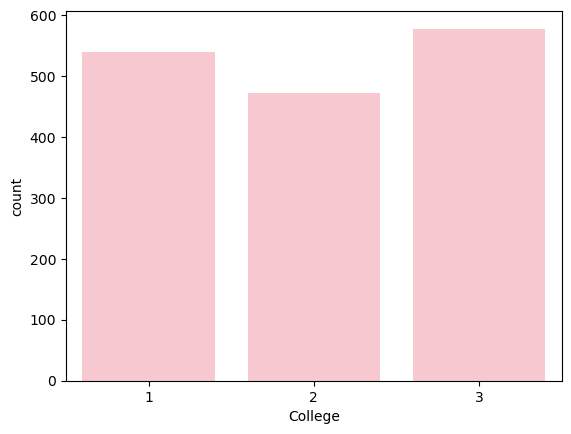

In [112]:
sns.countplot(x = 'College', data = df, color = 'Pink')

<Axes: xlabel='City', ylabel='count'>

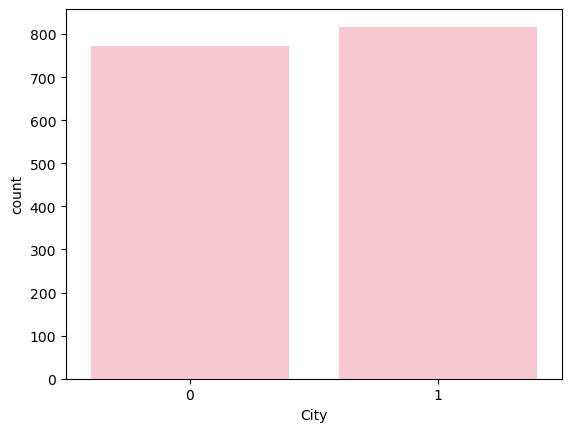

In [110]:
sns.countplot(x = 'City', data = df, color = 'Pink')

In [22]:
# Creating correlation matrix to understand correlation of independent vaariables on dependent variable
df_corr = df.corr()

In [23]:
df_corr

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Executive,Role_Manager
College,1.000000,0.014946,-0.041979,0.055060,-0.003539,-0.011752,0.029592,-0.014749,0.014749
City,0.014946,1.000000,0.004644,0.051670,-0.018616,-0.023613,-0.020365,0.048671,-0.048671
Previous CTC,-0.041979,0.004644,1.000000,0.005756,-0.032976,0.119163,0.258000,-0.012321,0.012321
Previous job change,0.055060,0.051670,0.005756,1.000000,0.019267,0.023488,0.011370,0.017150,-0.017150
Graduation Marks,-0.003539,-0.018616,-0.032976,0.019267,1.000000,-0.057061,-0.005450,-0.017858,0.017858
EXP (Month),-0.011752,-0.023613,0.119163,0.023488,-0.057061,1.000000,0.301115,0.026751,-0.026751
CTC,0.029592,-0.020365,0.258000,0.011370,-0.005450,0.301115,1.000000,-0.621311,0.621311
Role_Executive,-0.014749,0.048671,-0.012321,0.017150,-0.017858,0.026751,-0.621311,1.000000,-1.000000
Role_Manager,0.014749,-0.048671,0.012321,-0.017150,0.017858,-0.026751,0.621311,-1.000000,1.000000


<Axes: >

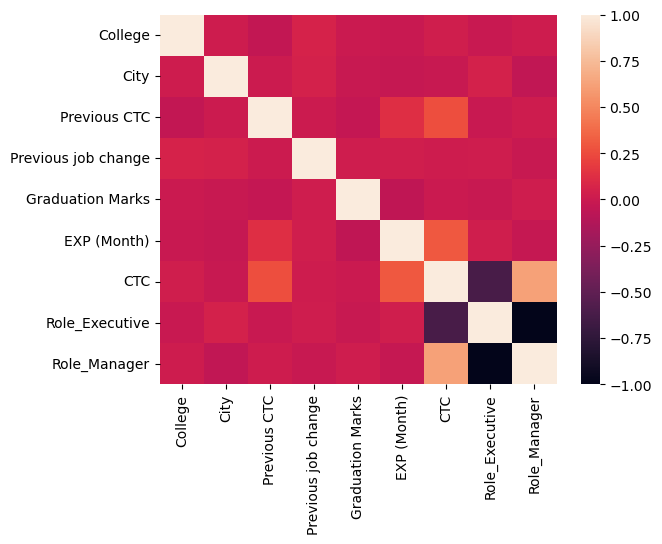

In [24]:
# Creating heat map of correlation matrix
sns.heatmap(data= df_corr)

Finding Outliers

In [25]:
df.describe()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Executive,Role_Manager
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,2.024544,0.514160,55518.453744,2.528634,59.855255,39.044682,75353.278798,0.793581,0.206419
std,0.838330,0.499957,6655.218445,1.123918,14.935139,14.108875,12587.288237,0.404862,0.404862
min,1.000000,0.000000,36990.000000,1.000000,35.000000,18.000000,53020.320000,0.000000,0.000000
25%,1.000000,0.000000,50518.000000,2.000000,46.000000,26.000000,66902.350000,1.000000,0.000000
50%,2.000000,1.000000,55291.000000,3.000000,60.000000,39.000000,73028.670000,1.000000,0.000000
75%,3.000000,1.000000,60109.000000,4.000000,73.000000,51.000000,80588.670000,1.000000,0.000000
max,3.000000,1.000000,77911.000000,4.000000,85.000000,64.000000,123416.990000,1.000000,1.000000


<Axes: >

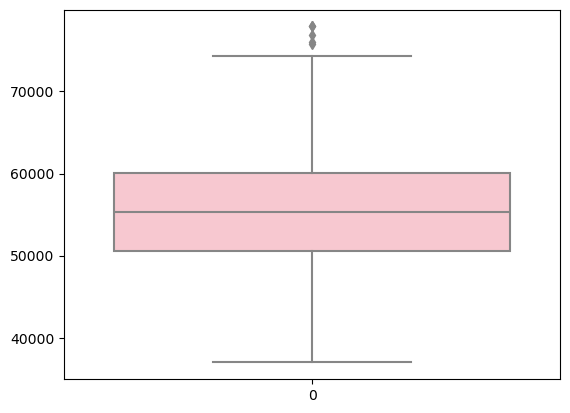

In [46]:
sns.boxplot(df['Previous CTC'], color = 'Pink')

<Axes: >

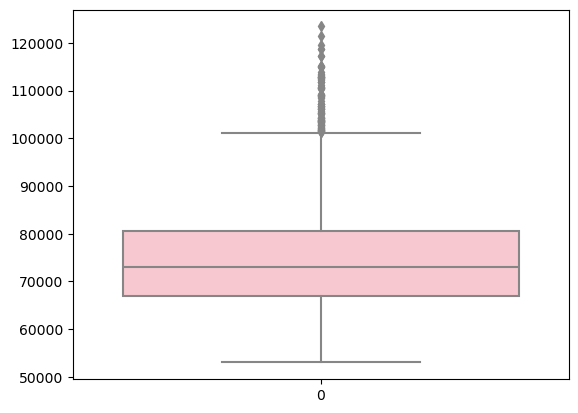

In [40]:
sns.boxplot(df['CTC'], color = 'Pink')

<Axes: >

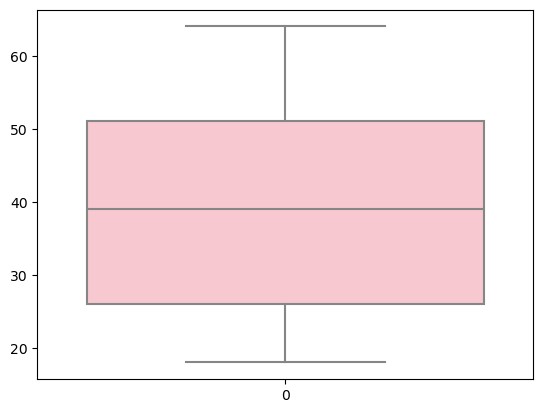

In [41]:
sns.boxplot(df['EXP (Month)'], color = 'Pink')

We can see there are hardly any outliers in the data set still, in Precious CTC and CTC shows slightly more deviated values and hence can be considered as outlier and are treated below.

In [48]:
np.percentile(df['Previous CTC'], [99])[0]

71506.92

In [50]:
ul = np.percentile(df['Previous CTC'], [99])[0]

In [51]:
df[(df['Previous CTC'] > ul)]

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Executive,Role_Manager
116,1,1,77911.0,1,50,58,87831.62,1,0
292,1,0,74198.0,1,57,25,99644.51,0,1
543,3,1,73856.0,1,75,54,121362.73,0,1
572,3,1,71543.0,4,82,30,61366.78,1,0
701,2,0,71549.0,4,47,50,83116.21,1,0
847,3,1,71756.0,4,67,23,72141.43,1,0
860,3,1,75785.0,4,63,37,110338.25,0,1
941,1,1,72319.0,1,51,50,63538.43,1,0
1024,3,1,72661.0,3,74,47,70238.70,1,0
1047,3,0,73214.0,4,57,22,100119.53,0,1


In [52]:
df['Previous CTC'][(df['Previous CTC'] > 3*ul)] = 3*ul

C:\Users\HP\AppData\Local\Temp\ipykernel_24344\1948618902.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Previous CTC'][(df['Previous CTC'] > 3*ul)] = 3*ul


In [53]:
df

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Executive,Role_Manager
0,2,0,55523.0,3,66,19,71406.58,0,1
1,2,0,57081.0,1,84,18,68005.87,1,0
2,1,0,60347.0,2,52,28,76764.02,1,0
3,1,0,49010.0,2,81,33,82092.39,1,0
4,3,0,57879.0,4,74,32,73878.10,1,0
...,...,...,...,...,...,...,...,...,...
1584,3,1,61285.0,3,44,60,77283.59,1,0
1585,3,0,63140.0,1,44,24,68416.86,1,0
1586,3,1,44907.0,1,60,19,70186.19,1,0
1587,3,0,52054.0,2,67,29,73394.09,1,0


In [54]:
np.percentile(df['CTC'], [99])[0]

112826.26

In [55]:
ul1 = np.percentile(df['CTC'], [99])[0]

In [56]:
df[(df['CTC'] > ul1)]

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Executive,Role_Manager
34,3,0,60894.0,4,80,28,118651.89,0,1
185,2,0,70258.0,4,38,36,115126.75,0,1
254,2,1,51912.0,2,66,50,113141.14,0,1
328,1,0,62264.0,2,52,64,114996.23,0,1
543,3,1,73856.0,1,75,54,121362.73,0,1
577,1,1,59101.0,3,56,31,113843.16,0,1
668,3,1,60476.0,1,85,62,113212.07,0,1
883,1,1,64930.0,1,66,51,114939.65,0,1
1146,3,1,61709.0,4,39,60,117207.24,0,1
1230,2,0,60298.0,1,47,52,123416.99,0,1


In [58]:
df.CTC[(df['CTC'] > 3*ul1)] = 3*ul1

C:\Users\HP\AppData\Local\Temp\ipykernel_24344\811086621.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.CTC[(df['CTC'] > 3*ul1)] = 3*ul1


In [59]:
df

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Executive,Role_Manager
0,2,0,55523.0,3,66,19,71406.58,0,1
1,2,0,57081.0,1,84,18,68005.87,1,0
2,1,0,60347.0,2,52,28,76764.02,1,0
3,1,0,49010.0,2,81,33,82092.39,1,0
4,3,0,57879.0,4,74,32,73878.10,1,0
...,...,...,...,...,...,...,...,...,...
1584,3,1,61285.0,3,44,60,77283.59,1,0
1585,3,0,63140.0,1,44,24,68416.86,1,0
1586,3,1,44907.0,1,60,19,70186.19,1,0
1587,3,0,52054.0,2,67,29,73394.09,1,0


### Creating Regression Model
#### Conditions
* Train_test_split = 0.2
* Scaling = None

### Multi Linear Regression

In [64]:
# Import required libraries - Linear Regression, train_test_split and r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [322]:
# Creating independent variable
x = df.drop('CTC', axis = 1)

In [66]:
# Creating dependent variable
y = df['CTC']

In [67]:
# Performing train_test_split
x_train , x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [68]:
# Performing Linear Regression
df_lm = LinearRegression()

In [69]:
df_lm.fit(x_train, y_train)

LinearRegression()

In [70]:
y_train_pred  = df_lm.predict(x_train)

In [71]:
y_test_pred = df_lm.predict(x_test)

* Evaluating Model Performance

In [78]:
print('r2_score:', r2_score(y_test, y_test_pred))
print('mean_squared_error:', mean_squared_error(y_test, y_test_pred))
print('mean_absolute_error:', mean_absolute_error(y_test, y_test_pred))
print('Intercept:', df_lm.intercept_, 'Coefficient:', df_lm.coef_)

r2_score: 0.5355989894790125
mean_squared_error: 68909870.6995251
mean_absolute_error: 6592.541375055976
Intercept: 45022.84897106748 Coefficient: [ 3.96799551e+02  9.32400785e+02  4.28858057e-01  9.82300083e+01
  9.94507467e+00  2.57591989e+02 -9.62061892e+03  9.62061892e+03]


In [323]:
print('r2_score:', r2_score(y_train, y_train_pred))
print('mean_squared_error:', mean_squared_error(y_train, y_train_pred))
print('mean_absolute_error:', mean_absolute_error(y_train, y_train_pred))
print('Intercept:', df_lm.intercept_, 'Coefficient:', df_lm.coef_)

r2_score: 0.5331293335456955
mean_squared_error: 75086299.73658578
mean_absolute_error: 6858.143106733391
Intercept: 45022.84897106748 Coefficient: [ 3.96799551e+02  9.32400785e+02  4.28858057e-01  9.82300083e+01
  9.94507467e+00  2.57591989e+02 -9.62061892e+03  9.62061892e+03]


### Ridge 

In [80]:
# Importing required library - Ridge
from sklearn.linear_model import Ridge

In [81]:
df_ridge = Ridge()

In [83]:
df_ridge.fit(x_train, y_train)

Ridge()

In [84]:
y_train_ridge_pred = df_ridge.predict(x_train)

In [85]:
y_test_ridge_pred = df_ridge.predict(x_test)

* Evaluating Model Performance

In [87]:
print('r2_score:', r2_score(y_test, y_test_ridge_pred))
print('mean_squared_error:', mean_squared_error(y_test, y_test_ridge_pred))
print('mean_absolute_error:', mean_absolute_error(y_test, y_test_ridge_pred))
print('Intercept:', df_ridge.intercept_, 'Coefficient:', df_ridge.coef_)

r2_score: 0.5354946428025424
mean_squared_error: 68925354.11971708
mean_absolute_error: 6593.601611669613
Intercept: 45007.36443088089 Coefficient: [ 3.97179007e+02  9.28005673e+02  4.28940733e-01  9.79410872e+01
  9.95889533e+00  2.57561423e+02 -9.59752826e+03  9.59752826e+03]


In [324]:
print('r2_score:', r2_score(y_train, y_train_ridge_pred))
print('mean_squared_error:', mean_squared_error(y_train, y_train_ridge_pred))
print('mean_absolute_error:', mean_absolute_error(y_train, y_train_ridge_pred))
print('Intercept:', df_ridge.intercept_, 'Coefficient:', df_ridge.coef_)

r2_score: 0.5331271458699289
mean_squared_error: 75086651.57809165
mean_absolute_error: 6859.004144656262
Intercept: 45007.36443088089 Coefficient: [ 3.97179007e+02  9.28005673e+02  4.28940733e-01  9.79410872e+01
  9.95889533e+00  2.57561423e+02 -9.59752826e+03  9.59752826e+03]


### Ridge with alpha = 0.5

In [88]:
df_ridge5 = Ridge(alpha = 0.5)

In [89]:
df_ridge5.fit(x_train, y_train)

Ridge(alpha=0.5)

In [90]:
y_train_ridge5_pred = df_ridge5.predict(x_train)

In [91]:
y_test_ridge5_pred = df_ridge5.predict(x_test)

* Evaluating Model Performance

In [92]:
print('r2_score:', r2_score(y_test, y_test_ridge5_pred))
print('mean_squared_error:', mean_squared_error(y_test, y_test_ridge5_pred))
print('mean_absolute_error:', mean_absolute_error(y_test, y_test_ridge5_pred))
print('Intercept:', df_ridge5.intercept_, 'Coefficient:', df_ridge5.coef_)

r2_score: 0.5355473450720549
mean_squared_error: 68917533.9244647
mean_absolute_error: 6593.072012263911
Intercept: 45015.09715701101 Coefficient: [ 3.96989910e+02  9.30198865e+02  4.28899451e-01  9.80853795e+01
  9.95199305e+00  2.57576686e+02 -9.60905966e+03  9.60905966e+03]


In [325]:
print('r2_score:', r2_score(y_train, y_train_ridge5_pred))
print('mean_squared_error:', mean_squared_error(y_train, y_train_ridge5_pred))
print('mean_absolute_error:', mean_absolute_error(y_train, y_train_ridge5_pred))
print('Intercept:', df_ridge5.intercept_, 'Coefficient:', df_ridge5.coef_)

r2_score: 0.5331287852994941
mean_squared_error: 75086387.91042396
mean_absolute_error: 6858.574125959747
Intercept: 45015.09715701101 Coefficient: [ 3.96989910e+02  9.30198865e+02  4.28899451e-01  9.80853795e+01
  9.95199305e+00  2.57576686e+02 -9.60905966e+03  9.60905966e+03]


### Lasso 

In [93]:
# Importing required library - Lasso
from sklearn.linear_model import Lasso

In [94]:
df_lasso = Lasso()

In [95]:
df_lasso.fit(x_train, y_train)

Lasso()

In [96]:
y_train_lasso_pred = df_lasso.predict(x_train)

In [97]:
y_test_lasso_pred = df_lasso.predict(x_test)

* Evaluating Model Performance

In [99]:
print('r2_score:', r2_score(y_test, y_test_lasso_pred))
print('mean_squared_error:', mean_squared_error(y_test, y_test_lasso_pred))
print('mean_absolute_error:', mean_absolute_error(y_test, y_test_lasso_pred))
print('Intercept:', df_lasso.intercept_, 'Coefficient:', df_lasso.coef_)

r2_score: 0.5356113298692822
mean_squared_error: 68908039.57797584
mean_absolute_error: 6592.525413938835
Intercept: 54644.72641223662 Coefficient: [ 3.95593651e+02  9.28303933e+02  4.28875006e-01  9.75207922e+01
  9.94023635e+00  2.57578387e+02 -1.92350034e+04  2.92200934e-12]


In [326]:
print('r2_score:', r2_score(y_train, y_train_lasso_pred))
print('mean_squared_error:', mean_squared_error(y_train, y_train_lasso_pred))
print('mean_absolute_error:', mean_absolute_error(y_train, y_train_lasso_pred))
print('Intercept:', df_lasso.intercept_, 'Coefficient:', df_lasso.coef_)

r2_score: 0.5331292572855016
mean_squared_error: 75086312.00142953
mean_absolute_error: 6858.190470026679
Intercept: 54644.72641223662 Coefficient: [ 3.95593651e+02  9.28303933e+02  4.28875006e-01  9.75207922e+01
  9.94023635e+00  2.57578387e+02 -1.92350034e+04  2.92200934e-12]


### Lasso with alpha = 0.5

In [100]:
df_lasso5 = Lasso(alpha = 0.5)

In [101]:
df_lasso5.fit(x_train, y_train
             )

Lasso(alpha=0.5)

In [102]:
y_train_lasso5_pred = df_lasso5.predict(x_train)

In [103]:
y_test_lasso5_pred = df_lasso5.predict(x_test)

* Evaluating Model Performance

In [104]:
print('r2_score:', r2_score(y_test, y_test_lasso5_pred))
print('mean_squared_error:', mean_squared_error(y_test, y_test_lasso5_pred))
print('mean_absolute_error:', mean_absolute_error(y_test, y_test_lasso5_pred))
print('Intercept:', df_lasso5.intercept_, 'Coefficient:', df_lasso5.coef_)

r2_score: 0.5356051789945919
mean_squared_error: 68908952.27189766
mean_absolute_error: 6592.533391153855
Intercept: 54644.096946996055 Coefficient: [ 3.96196644e+02  9.30352308e+02  4.28866534e-01  9.78754015e+01
  9.94265540e+00  2.57585188e+02 -1.92381206e+04  0.00000000e+00]


In [327]:
print('r2_score:', r2_score(y_train, y_train_lasso5_pred))
print('mean_squared_error:', mean_squared_error(y_train, y_train_lasso5_pred))
print('mean_absolute_error:', mean_absolute_error(y_train, y_train_lasso5_pred))
print('Intercept:', df_lasso5.intercept_, 'Coefficient:', df_lasso5.coef_)

r2_score: 0.5331293144805622
mean_squared_error: 75086302.80281034
mean_absolute_error: 6858.166788031116
Intercept: 54644.096946996055 Coefficient: [ 3.96196644e+02  9.30352308e+02  4.28866534e-01  9.78754015e+01
  9.94265540e+00  2.57585188e+02 -1.92381206e+04  0.00000000e+00]


### Decision Tree Regression

In [114]:
# Importing required library - Tree
from sklearn import tree

In [115]:
df_tree = tree.DecisionTreeRegressor()

In [116]:
df_tree.fit(x_train, y_train)

DecisionTreeRegressor()

In [117]:
y_train_tree_pred = df_tree.predict(x_train)

In [118]:
y_test_tree_pred = df_tree.predict(x_test)

* Evaluating Model Performance

In [122]:
print('r2_score:', r2_score(y_test, y_test_tree_pred))
print('mean_squared_error:', mean_squared_error(y_test, y_test_tree_pred))
print('mean_absolute_error:', mean_absolute_error(y_test, y_test_tree_pred))

r2_score: 0.37813739683401426
mean_squared_error: 92274716.47609937
mean_absolute_error: 6776.052893081761


In [328]:
print('r2_score:', r2_score(y_train, y_train_tree_pred))
print('mean_squared_error:', mean_squared_error(y_train, y_train_tree_pred))
print('mean_absolute_error:', mean_absolute_error(y_train, y_train_tree_pred))

r2_score: 1.0
mean_squared_error: 0.0
mean_absolute_error: 0.0


### DecisionTreeRegression with max_depth  = 5 

In [135]:
df_tree5 = tree.DecisionTreeRegressor(max_depth = 5)

In [136]:
df_tree5.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [137]:
y_train_tree5_pred = df_tree5.predict(x_train)

In [138]:
y_test_tree5_pred = df_tree5.predict(x_test)

* Evaluating Model Peformance

In [139]:
print('r2_score:', r2_score(y_test, y_test_tree5_pred))
print('mean_squared_error:', mean_squared_error(y_test, y_test_tree5_pred))
print('mean_absolute_error:', mean_absolute_error(y_test, y_test_tree5_pred))

r2_score: 0.5592769402126234
mean_squared_error: 65396431.911671475
mean_absolute_error: 6214.504327721762


In [329]:
print('r2_score:', r2_score(y_train, y_train_tree5_pred))
print('mean_squared_error:', mean_squared_error(y_train, y_train_tree5_pred))
print('mean_absolute_error:', mean_absolute_error(y_train, y_train_tree5_pred))

r2_score: 0.6766007100835709
mean_squared_error: 52011954.83469235
mean_absolute_error: 5717.083381556768


### Plotting Decision Tree

In [140]:
# Importing required library
import graphviz
import pydotplus
from IPython.display import Image

In [141]:
dot_data = tree.export_graphviz(df_tree5, out_file = None, feature_names = x_train.columns, filled = True)

In [142]:
graph = pydotplus.graph_from_dot_data(dot_data)

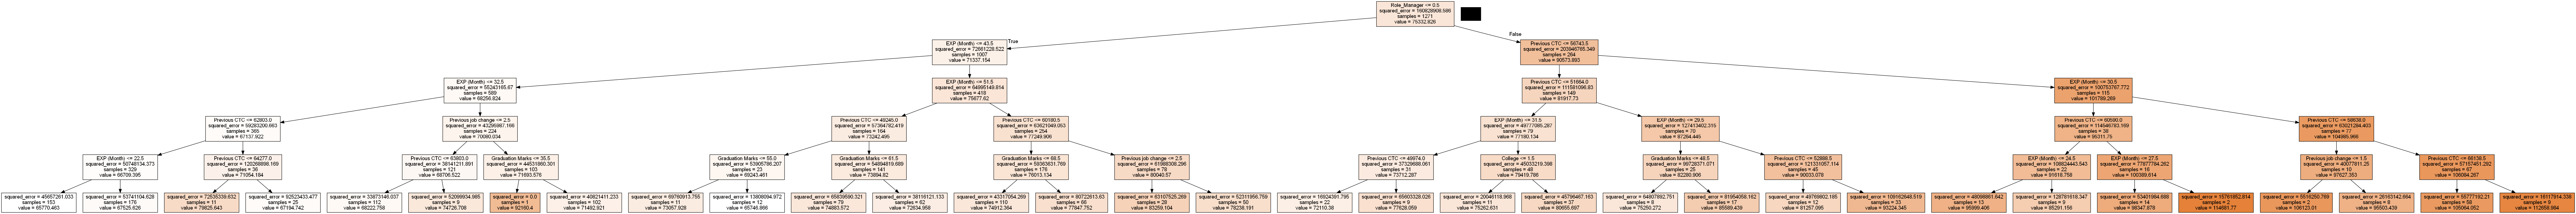

In [143]:
Image(graph.create_png())

### Random Forest Technique

In [145]:
# Importing required library - RandomForest
from sklearn.ensemble import RandomForestRegressor

In [146]:
df_rfr = RandomForestRegressor()

In [147]:
df_rfr.fit(x_train, y_train)

RandomForestRegressor()

* Evaluating Model Performance

In [148]:
y_train_rfr_pred = df_rfr.predict(x_train)

In [151]:
y_test_rfr_pred = df_rfr.predict(x_test)

In [152]:
print('r2_score:', r2_score(y_test, y_test_rfr_pred))
print('mean_squared_error:', mean_squared_error(y_test, y_test_rfr_pred))
print('mean_absolute_error:', mean_absolute_error(y_test, y_test_rfr_pred))

r2_score: 0.6549294979335957
mean_squared_error: 51203083.41478406
mean_absolute_error: 5449.731602830186


### RandomForest Regression with GridSearchCV

In [157]:
from sklearn.model_selection import GridSearchCV

In [164]:
df_rfr_gscv = RandomForestRegressor(n_estimators = 250, max_depth = 3, n_jobs = -1, random_state=0)

In [166]:
params_grid = {'max_features': [4,5,6,7,8],
              'min_samples_split': [2,6,8]}

In [167]:
df_rfr_gscv1 = GridSearchCV(df_rfr_gscv, params_grid, n_jobs = -1, cv = 5, scoring = 'accuracy')

In [168]:
df_rfr_gscv1.fit(x_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=3, n_estimators=250,
                                             n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'max_features': [4, 5, 6, 7, 8],
                         'min_samples_split': [2, 6, 8]},
             scoring='accuracy')

In [169]:
df_rfr_gscv1.best_params_

{'max_features': 4, 'min_samples_split': 2}

In [170]:
df_rfr_gscv2 = df_rfr_gscv1.best_estimator_

In [171]:
df_rfr_gscv2

RandomForestRegressor(max_depth=3, max_features=4, n_estimators=250, n_jobs=-1,
                      random_state=0)

In [172]:
y_test_gscv_pred = df_rfr_gscv2.predict(x_test)

In [334]:
y_train_gscv_pred = df_rfr_gscv2.predict(x_train)

* Evaluating Model Performance

In [173]:
print('r2_score:', r2_score(y_test, y_test_gscv_pred))
print('mean_squared_error:', mean_squared_error(y_test, y_test_gscv_pred))
print('mean_absoute_error:', mean_absolute_error(y_test, y_test_gscv_pred))

r2_score: 0.5941105255358512
mean_squared_error: 60227670.84904667
mean_absoute_error: 6028.139930925169


In [335]:
print('r2_score:', r2_score(y_train, y_train_gscv_pred))
print('mean_squared_error:', mean_squared_error(y_train, y_train_gscv_pred))
print('mean_absoute_error:', mean_absolute_error(y_train, y_train_gscv_pred))

r2_score: 0.6116025378887291
mean_squared_error: 62465539.928862706
mean_absoute_error: 6259.598234529599


### Creating Regression Model
#### Conditions
* Train_test_split = 0.3
* Scaling = None

In [184]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

### Multi Linear Regression

In [185]:
df_lr = LinearRegression()

In [186]:
df_lr.fit(x1_train, y1_train)

LinearRegression()

In [194]:
y1_test_lr_pred= df_lr.predict(x1_test)

In [336]:
y1_train_lr_pred= df_lr.predict(x1_train)

* Evaluating Model Performance

In [195]:
print('r2_score:', r2_score(y1_test, y1_test_lr_pred))
print('mean_squared_error:', mean_squared_error(y1_test, y1_test_lr_pred))
print('mean_absolute_error:', mean_absolute_error(y1_test, y1_test_lr_pred))
print('Intercept:', df_lr.intercept_, 'Coefficient:', df_lr.coef_)

r2_score: 0.5467294464870962
mean_squared_error: 71970784.43482259
mean_absolute_error: 6652.07688760159
Intercept: 45191.494370637316 Coefficient: [ 4.95704772e+02  9.78191089e+02  4.17616124e-01  2.54092625e+02
  4.81470170e+00  2.56281046e+02 -9.61644700e+03  9.61644700e+03]


In [337]:
print('r2_score:', r2_score(y1_train, y1_train_lr_pred))
print('mean_squared_error:', mean_squared_error(y1_train, y1_train_lr_pred))
print('mean_absolute_error:', mean_absolute_error(y1_train, y1_train_lr_pred))
print('Intercept:', df_lr.intercept_, 'Coefficient:', df_lr.coef_)

r2_score: 0.5272114420142691
mean_squared_error: 74734207.22839975
mean_absolute_error: 6862.693540342115
Intercept: 45191.494370637316 Coefficient: [ 4.95704772e+02  9.78191089e+02  4.17616124e-01  2.54092625e+02
  4.81470170e+00  2.56281046e+02 -9.61644700e+03  9.61644700e+03]


### Ridge 

In [191]:
df_r = Ridge()

In [192]:
df_r.fit(x1_train, y1_train)

Ridge()

In [193]:
y1_test_r_pred = df_r.predict(x1_test)

In [338]:
y1_train_r_pred = df_r.predict(x1_train)

* Evaluating Model Performance

In [196]:
print('r2_score:', r2_score(y1_test, y1_test_r_pred))
print('mean_squared_error:', mean_squared_error(y1_test, y1_test_r_pred))
print('mean_absolute_error:', mean_absolute_error(y1_test, y1_test_r_pred))
print('Intercept:', df_r.intercept_, 'Coefficient:', df_r.coef_)

r2_score: 0.5466565812454367
mean_squared_error: 71982354.05601159
mean_absolute_error: 6653.316212026647
Intercept: 45174.74457869812 Coefficient: [ 4.96133120e+02  9.72976204e+02  4.17713390e-01  2.53504046e+02
  4.83917702e+00  2.56222452e+02 -9.58994254e+03  9.58994254e+03]


In [339]:
print('r2_score:', r2_score(y1_train, y1_train_r_pred))
print('mean_squared_error:', mean_squared_error(y1_train, y1_train_r_pred))
print('mean_absolute_error:', mean_absolute_error(y1_train, y1_train_r_pred))
print('Intercept:', df_r.intercept_, 'Coefficient:', df_r.coef_)

r2_score: 0.5272085213605346
mean_squared_error: 74734668.89934705
mean_absolute_error: 6863.50603503182
Intercept: 45174.74457869812 Coefficient: [ 4.96133120e+02  9.72976204e+02  4.17713390e-01  2.53504046e+02
  4.83917702e+00  2.56222452e+02 -9.58994254e+03  9.58994254e+03]


### Ridge with alpha = 0.5

In [201]:
df_r5 = Ridge(0.5)

In [202]:
df_r5.fit(x1_train, y1_train)

Ridge(alpha=0.5)

In [204]:
y1_test_r5_pred = df_r5.predict(x1_test)

In [340]:
y1_train_r5_pred = df_r5.predict(x1_train)

* Evaluating Model Performance

In [205]:
print('r2_score:', r2_score(y1_test, y1_test_r5_pred))
print('mean_squared_error:', mean_squared_error(y1_test, y1_test_r5_pred))
print('mean_absolute_error:', mean_absolute_error(y1_test, y1_test_r5_pred))
print('Intercept:', df_r5.intercept_, 'Coefficient:', df_r5.coef_)

r2_score: 0.5466937015172044
mean_squared_error: 71976460.05946395
mean_absolute_error: 6652.697316680481
Intercept: 45183.10719493867 Coefficient: [ 4.95919837e+02  9.75577754e+02  4.17664835e-01  2.53797965e+02
  4.82695611e+00  2.56251708e+02 -9.60317641e+03  9.60317641e+03]


In [341]:
print('r2_score:', r2_score(y1_train, y1_train_r5_pred))
print('mean_squared_error:', mean_squared_error(y1_train, y1_train_r5_pred))
print('mean_absolute_error:', mean_absolute_error(y1_train, y1_train_r5_pred))
print('Intercept:', df_r5.intercept_, 'Coefficient:', df_r5.coef_)

r2_score: 0.5272107098145744
mean_squared_error: 74734322.9680106
mean_absolute_error: 6863.098067087184
Intercept: 45183.10719493867 Coefficient: [ 4.95919837e+02  9.75577754e+02  4.17664835e-01  2.53797965e+02
  4.82695611e+00  2.56251708e+02 -9.60317641e+03  9.60317641e+03]


### Lasso 

In [206]:
df_l = Lasso()

In [207]:
df_l.fit(x1_train, y1_train)

Lasso()

In [209]:
y1_test_l_pred = df_l.predict(x1_test)

In [342]:
y1_train_l_pred = df_l.predict(x1_train)

* Evaluating Model Performance

In [210]:
print('r2_score:', r2_score(y1_test, y1_test_l_pred))
print('mean_squared_error:', mean_squared_error(y1_test, y1_test_l_pred))
print('mean_absolute_error:', mean_absolute_error(y1_test, y1_test_l_pred))
print('Intercept:', df_l.intercept_, 'Coefficient:', df_l.coef_)

r2_score: 0.546749827060452
mean_squared_error: 71967548.3855353
mean_absolute_error: 6652.0521331841
Intercept: 54809.22337984537 Coefficient: [ 4.94479875e+02  9.74058966e+02  4.17634292e-01  2.53372272e+02
  4.81169090e+00  2.56265313e+02 -1.92266222e+04  3.64938448e-12]


In [343]:
print('r2_score:', r2_score(y1_train, y1_train_l_pred))
print('mean_squared_error:', mean_squared_error(y1_train, y1_train_l_pred))
print('mean_absolute_error:', mean_absolute_error(y1_train, y1_train_l_pred))
print('Intercept:', df_l.intercept_, 'Coefficient:', df_l.coef_)

r2_score: 0.5272113637707396
mean_squared_error: 74734219.5964405
mean_absolute_error: 6862.745810978905
Intercept: 54809.22337984537 Coefficient: [ 4.94479875e+02  9.74058966e+02  4.17634292e-01  2.53372272e+02
  4.81169090e+00  2.56265313e+02 -1.92266222e+04  3.64938448e-12]


### Lasso with alpha = 0.5

In [211]:
df_l5 = Lasso(alpha = 0.5)

In [212]:
df_l5.fit(x1_train, y1_train)

Lasso(alpha=0.5)

In [213]:
y1_test_l5_pred = df_l5.predict(x1_test)

In [344]:
y1_train_l5_pred = df_l5.predict(x1_train)

* Evaluating Model Performance

In [214]:
print('r2_score:', r2_score(y1_test, y1_test_l5_pred))
print('mean_squared_error:', mean_squared_error(y1_test, y1_test_l5_pred))
print('mean_absolute_error:', mean_absolute_error(y1_test, y1_test_l5_pred))
print('Intercept:', df_l5.intercept_, 'Coefficient:', df_l5.coef_)

r2_score: 0.5467396561286739
mean_squared_error: 71969163.33698723
mean_absolute_error: 6652.064506979446
Intercept: 54808.58214138256 Coefficient: [ 4.95092361e+02  9.76124931e+02  4.17625212e-01  2.53732455e+02
  4.81319609e+00  2.56273179e+02 -1.92297581e+04  3.15083469e-12]


In [345]:
print('r2_score:', r2_score(y1_train, y1_train_l5_pred))
print('mean_squared_error:', mean_squared_error(y1_train, y1_train_l5_pred))
print('mean_absolute_error:', mean_absolute_error(y1_train, y1_train_l5_pred))
print('Intercept:', df_l5.intercept_, 'Coefficient:', df_l5.coef_)

r2_score: 0.5272114224529979
mean_squared_error: 74734210.3204714
mean_absolute_error: 6862.7196761549785
Intercept: 54808.58214138256 Coefficient: [ 4.95092361e+02  9.76124931e+02  4.17625212e-01  2.53732455e+02
  4.81319609e+00  2.56273179e+02 -1.92297581e+04  3.15083469e-12]


### Decision Tree Regression

In [215]:
df_dtree = tree.DecisionTreeRegressor()

In [217]:
df_dtree.fit(x1_train, y1_train)

DecisionTreeRegressor()

In [219]:
y1_test_dtree_pred = df_dtree.predict(x1_test)

In [346]:
y1_train_dtree_pred = df_dtree.predict(x1_train)

* Evaluating Model Performance

In [220]:
print('r2_score:', r2_score(y1_test, y1_test_dtree_pred))
print('mean_squared_error:', mean_squared_error(y1_test, y1_test_dtree_pred))
print('mean_absolute_error:', mean_absolute_error(y1_test, y1_test_dtree_pred))

r2_score: 0.40054495948360913
mean_squared_error: 95182114.00455514
mean_absolute_error: 7055.338490566038


In [347]:
print('r2_score:', r2_score(y1_train, y1_train_dtree_pred))
print('mean_squared_error:', mean_squared_error(y1_train, y1_train_dtree_pred))
print('mean_absolute_error:', mean_absolute_error(y1_train, y1_train_dtree_pred))

r2_score: 1.0
mean_squared_error: 0.0
mean_absolute_error: 0.0


### Decision Tree Regression with max_depth = 5

In [221]:
df_dtree5 = tree.DecisionTreeRegressor(max_depth= 5)

In [222]:
df_dtree5.fit(x1_train, y1_train)

DecisionTreeRegressor(max_depth=5)

In [223]:
y1_test_dtree5_pred = df_dtree5.predict(x1_test)

In [348]:
y1_train_dtree5_pred = df_dtree5.predict(x1_train)

* Evaluating Model Performance

In [224]:
print('r2_score:', r2_score(y1_test, y1_test_dtree5_pred))
print('mean_squared_error:', mean_squared_error(y1_test, y1_test_dtree5_pred))
print('mean_absolute_error:', mean_absolute_error(y1_test, y1_test_dtree5_pred))

r2_score: 0.578508241033891
mean_squared_error: 66924913.366869435
mean_absolute_error: 6320.555384168576


In [349]:
print('r2_score:', r2_score(y1_train, y1_train_dtree5_pred))
print('mean_squared_error:', mean_squared_error(y1_train, y1_train_dtree5_pred))
print('mean_absolute_error:', mean_absolute_error(y1_train, y1_train_dtree5_pred))

r2_score: 0.6723478933385554
mean_squared_error: 51792328.77881358
mean_absolute_error: 5669.268513099261


### Plotting the decision tree

In [225]:
dot_data1 = tree.export_graphviz(df_dtree5, out_file = None, feature_names = x_train.columns, filled = True)

In [226]:
graph1 = pydotplus.graph_from_dot_data(dot_data1)

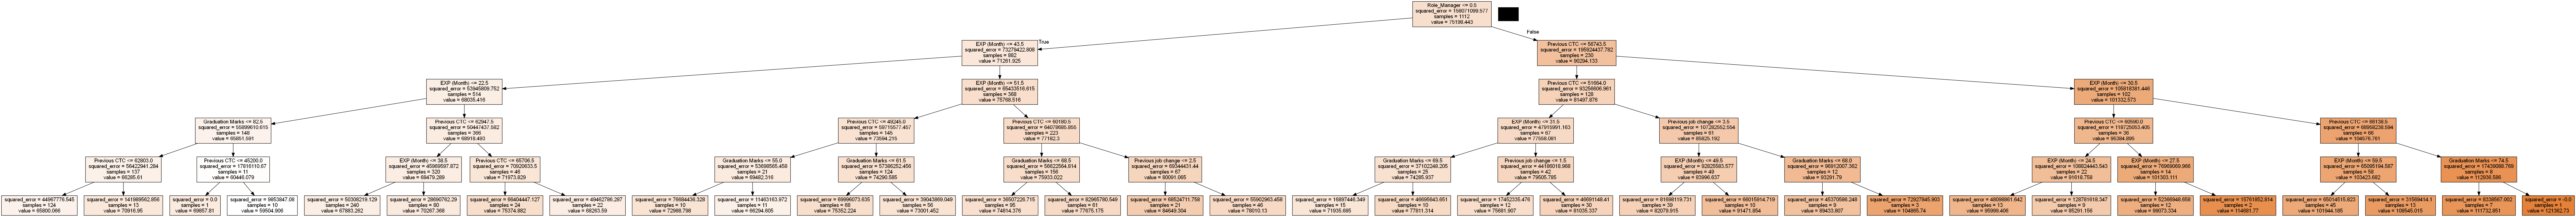

In [227]:
Image(graph1.create_png())

### Random Forest Regression

In [228]:
df_rfr_ = RandomForestRegressor()

In [229]:
df_rfr_.fit(x1_train, y1_train)

RandomForestRegressor()

In [230]:
y1_test_pred_rfr = df_rfr_.predict(x1_test)

In [350]:
y1_train_pred_rfr = df_rfr_.predict(x1_train)

* Evaluating Model Performance

In [231]:
print('r2_score:', r2_score(y1_test, y1_test_pred_rfr))
print('mean_squared_error:', mean_squared_error(y1_test, y1_test_pred_rfr))
print('mean_absolute_error:', mean_absolute_error(y1_test, y1_test_pred_rfr))

r2_score: 0.6660031146010215
mean_squared_error: 53032383.53926672
mean_absolute_error: 5569.713603983227


In [351]:
print('r2_score:', r2_score(y1_train, y1_train_pred_rfr))
print('mean_squared_error:', mean_squared_error(y1_train, y1_train_pred_rfr))
print('mean_absolute_error:', mean_absolute_error(y1_train, y1_train_pred_rfr))

r2_score: 0.9459467924118296
mean_squared_error: 8544249.959145507
mean_absolute_error: 2259.388143165465


### Random Forest Regression with GridSearchCV

In [232]:
df_gscv_rfr = RandomForestRegressor(n_estimators = 250, max_depth = 3, n_jobs = -1, random_state=0)

In [233]:
param_grid1 = {'max_features': [4,5,6,7,8],
              'min_samples_split': [2,6,8]}

In [234]:
df_gscv_rfr1 = GridSearchCV(df_gscv_rfr, param_grid1, n_jobs= -1, cv= 5, scoring = 'accuracy')

In [238]:
df_gscv_rfr1.fit(x1_train, y1_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=3, n_estimators=250,
                                             n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'max_features': [4, 5, 6, 7, 8],
                         'min_samples_split': [2, 6, 8]},
             scoring='accuracy')

In [239]:
df_gscv_rfr1.best_params_

{'max_features': 4, 'min_samples_split': 2}

In [240]:
df_gscv_rfr1.best_estimator_

RandomForestRegressor(max_depth=3, max_features=4, n_estimators=250, n_jobs=-1,
                      random_state=0)

In [241]:
y1_test_gscv_rfr1_pred = df_gscv_rfr1.best_estimator_.predict(x1_test)

In [352]:
y1_train_gscv_rfr1_pred = df_gscv_rfr1.best_estimator_.predict(x1_train)

* Evaluating Model Performance

In [242]:
print('r2_score:', r2_score(y1_test, y1_test_gscv_rfr1_pred))
print('mean_squared_error:', mean_squared_error(y1_test, y1_test_gscv_rfr1_pred))
print('mean_absolute_error:', mean_absolute_error(y1_test, y1_test_gscv_rfr1_pred))

r2_score: 0.59205666038212
mean_squared_error: 64773680.817596376
mean_absolute_error: 6268.667769432013


In [353]:
print('r2_score:', r2_score(y1_train, y1_train_gscv_rfr1_pred))
print('mean_squared_error:', mean_squared_error(y1_train, y1_train_gscv_rfr1_pred))
print('mean_absolute_error:', mean_absolute_error(y1_train, y1_train_gscv_rfr1_pred))

r2_score: 0.6085366199846198
mean_squared_error: 61879046.92330178
mean_absolute_error: 6235.431075136346


#### Note:
* In the first half of the project that is creating regression models without scaling, I have trained the model twice- First on test_size = 0.2 and then on test_size = 0.3 and rest all the measures taken during regression techniques have been kept same as to understand the regression performance under different test sizes but having same measures.

### Creating Regression Model
#### Conditions
* Train_test_split = 0.2
* With Standard Scaling

In [252]:
# Data training using train_test_split 
x2_train, x2_test, y2_train, y2_test = train_test_split(x,y, test_size = 0.2, random_state= 0)

In [253]:
# Importing required library to preprocess the data
from sklearn import preprocessing

In [254]:
# Standardizing the data
scaler = preprocessing.StandardScaler().fit(x2_train)

In [255]:
x2_train_s = scaler.transform(x2_train)

In [256]:
scaler1 = preprocessing.StandardScaler().fit(x2_test)

In [257]:
x2_test_s = scaler1.transform(x2_test)

In [291]:
df

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Executive,Role_Manager
0,2,0,55523.0,3,66,19,71406.58,0,1
1,2,0,57081.0,1,84,18,68005.87,1,0
2,1,0,60347.0,2,52,28,76764.02,1,0
3,1,0,49010.0,2,81,33,82092.39,1,0
4,3,0,57879.0,4,74,32,73878.10,1,0
...,...,...,...,...,...,...,...,...,...
1584,3,1,61285.0,3,44,60,77283.59,1,0
1585,3,0,63140.0,1,44,24,68416.86,1,0
1586,3,1,44907.0,1,60,19,70186.19,1,0
1587,3,0,52054.0,2,67,29,73394.09,1,0


### Multi Linear Regression

In [250]:
df_mlr = LinearRegression()

In [259]:
df_mlr.fit(x2_train_s, y2_train)

LinearRegression()

In [260]:
y2_test_mlr_pred = df_mlr.predict(x2_test_s)

In [354]:
y2_train_mlr_pred = df_mlr.predict(x2_train_s)

* Evaluating Model Performance

In [261]:
print('r2_score:', r2_score(y2_test, y2_test_mlr_pred))
print('mean_squared_error:', mean_squared_error(y2_test, y2_test_mlr_pred))
print('mean_absolute_error:', mean_absolute_error(y2_test, y2_test_mlr_pred))

r2_score: 0.5352399194887913
mean_squared_error: 68963151.08875263
mean_absolute_error: 6586.4677554515365


In [355]:
print('r2_score:', r2_score(y2_train, y2_train_mlr_pred))
print('mean_squared_error:', mean_squared_error(y2_train, y2_train_mlr_pred))
print('mean_absolute_error:', mean_absolute_error(y2_train, y2_train_mlr_pred))

r2_score: 0.5331293335456955
mean_squared_error: 75086299.73658578
mean_absolute_error: 6858.143106733391


### Ridge 

In [262]:
df_rr = Ridge()

In [263]:
df_rr.fit(x2_train_s, y2_train)

Ridge()

In [264]:
y2_test_rr_pred = df_rr.predict(x2_test_s)

In [356]:
y2_train_rr_pred = df_rr.predict(x2_train_s)

* Evaluating Model Performance

In [270]:
print('r2_score:', r2_score(y2_test, y2_test_rr_pred))
print('mean_squared_error:', mean_squared_error(y2_test, y2_test_rr_pred))
print('mean_absolute_error:', mean_absolute_error(y2_test, y2_test_rr_pred))

r2_score: 0.5352404680180332
mean_squared_error: 68963069.69556384
mean_absolute_error: 6586.5135593982595


In [357]:
print('r2_score:', r2_score(y2_train, y2_train_rr_pred))
print('mean_squared_error:', mean_squared_error(y2_train, y2_train_rr_pred))
print('mean_absolute_error:', mean_absolute_error(y2_train, y2_train_rr_pred))

r2_score: 0.5331292000858011
mean_squared_error: 75086321.20079494
mean_absolute_error: 6858.310108994406


### Ridge with alpha  = 0.5

In [268]:
df_rr5 = Ridge(alpha = 0.5)

In [269]:
df_rr5.fit(x2_train_s, y2_train)

Ridge(alpha=0.5)

In [271]:
y2_test_rr5_pred = df_rr5.predict(x2_test_s)

In [359]:
y2_train_rr5_pred = df_rr5.predict(x2_train_s)

* Evaluating Model Performance

In [358]:
print('r2_score:', r2_score(y2_test, y2_test_rr5_pred))
print('mean_squared_error:', mean_squared_error(y2_test, y2_test_rr5_pred))
print('mean_absolute_error:', mean_absolute_error(y2_test, y2_test_rr5_pred))

r2_score: 0.5352402258913245
mean_squared_error: 68963105.62339304
mean_absolute_error: 6586.490651878364


In [360]:
print('r2_score:', r2_score(y2_train, y2_train_rr5_pred))
print('mean_squared_error:', mean_squared_error(y2_train, y2_train_rr5_pred))
print('mean_absolute_error:', mean_absolute_error(y2_train, y2_train_rr5_pred))

r2_score: 0.5331293001617217
mean_squared_error: 75086305.10569385
mean_absolute_error: 6858.226624751096


### Lasso 

In [277]:
df_lassor = Lasso()

In [278]:
df_lassor.fit(x2_train_s, y2_train)

Lasso()

In [279]:
y2_test_lassor_pred = df_lassor.predict(x2_test_s)

In [361]:
y2_train_lassor_pred = df_lassor.predict(x2_train_s)

* Evaluating Model Performance

In [280]:
print('r2_score:', r2_score(y2_test, y2_test_lassor_pred))
print('mean_squared_error:', mean_squared_error(y2_test, y2_test_lassor_pred))
print('mean_absolute_error:', mean_absolute_error(y2_test, y2_test_lassor_pred))

r2_score: 0.5352555391245473
mean_squared_error: 68960833.37829137
mean_absolute_error: 6586.392221181653


In [362]:
print('r2_score:', r2_score(y2_train, y2_train_lassor_pred))
print('mean_squared_error:', mean_squared_error(y2_train, y2_train_lassor_pred))
print('mean_absolute_error:', mean_absolute_error(y2_train, y2_train_lassor_pred))

r2_score: 0.5331292915652062
mean_squared_error: 75086306.48826206
mean_absolute_error: 6858.167249681215


### Lasso with alpha = 0.5

In [281]:
df_lassor5 = Lasso(alpha= 0.5)

In [282]:
df_lassor5.fit(x2_train_s, y2_train)

Lasso(alpha=0.5)

In [283]:
y2_test_lassor5_pred = df_lassor5.predict(x2_test_s)

In [363]:
y2_train_lassor5_pred = df_lassor5.predict(x2_train_s)

* Evaluating Model Performance

In [284]:
print('r2_score:', r2_score(y2_test, y2_test_lassor5_pred))
print('mean_squared_error:', mean_squared_error(y2_test, y2_test_lassor5_pred))
print('mean_absolute_error:', mean_absolute_error(y2_test, y2_test_lassor5_pred))

r2_score: 0.5352477529549304
mean_squared_error: 68961988.72448869
mean_absolute_error: 6586.429932059182


In [364]:
print('r2_score:', r2_score(y2_train, y2_train_lassor5_pred))
print('mean_squared_error:', mean_squared_error(y2_train, y2_train_lassor5_pred))
print('mean_absolute_error:', mean_absolute_error(y2_train, y2_train_lassor5_pred))

r2_score: 0.5331293230548312
mean_squared_error: 75086301.42382003
mean_absolute_error: 6858.155168866522


### Decision Tree Regression

In [292]:
df_dt = tree.DecisionTreeRegressor(max_depth = 3)

In [293]:
df_dt.fit(x2_train_s, y2_train)

DecisionTreeRegressor(max_depth=3)

In [294]:
y2_test_df_dt_pred = df_dt.predict(x2_test_s)

In [365]:
y2_train_df_dt_pred = df_dt.predict(x2_train_s)

* Evaluating Model Performance

In [295]:
print('r2_score:', r2_score(y2_test, y2_test_df_dt_pred))
print('mean_squared_error:', mean_squared_error(y2_test, y2_test_df_dt_pred))
print('mean_absolute_error:', mean_absolute_error(y2_test, y2_test_df_dt_pred))

r2_score: 0.5971254589733475
mean_squared_error: 59780301.72486568
mean_absolute_error: 5934.647561135478


In [366]:
print('r2_score:', r2_score(y2_train, y2_train_df_dt_pred))
print('mean_squared_error:', mean_squared_error(y2_train, y2_train_df_dt_pred))
print('mean_absolute_error:', mean_absolute_error(y2_train, y2_train_df_dt_pred))

r2_score: 0.6137194061789908
mean_squared_error: 62125086.31211998
mean_absolute_error: 6183.024264239776


### Random Forest Technique

In [305]:
df_rft = RandomForestRegressor()

In [306]:
df_rft.fit(x2_train_s, y2_train)

RandomForestRegressor()

In [307]:
y2_test_rft_pred = df_rft.predict(x2_test_s)

In [367]:
y2_train_rft_pred = df_rft.predict(x2_train_s)

* Evaluating Model Performance

In [308]:
print('r2_score:', r2_score(y2_test, y2_test_rft_pred))
print('mean_squared_error:', mean_squared_error(y2_test, y2_test_rft_pred))
print('mean_absolute_error:', mean_absolute_error(y2_test, y2_test_rft_pred))

r2_score: 0.5916311144183313
mean_squared_error: 60595576.808871314
mean_absolute_error: 6022.592914779875


In [368]:
print('r2_score:', r2_score(y2_train, y2_train_rft_pred))
print('mean_squared_error:', mean_squared_error(y2_train, y2_train_rft_pred))
print('mean_absolute_error:', mean_absolute_error(y2_train, y2_train_rft_pred))

r2_score: 0.9482111562533211
mean_squared_error: 8329143.216700565
mean_absolute_error: 2204.8065667191154


### Random Forest Technique with GridSearchCV

In [309]:
df_gscv_rft = RandomForestRegressor(n_estimators = 250, max_depth = 3, n_jobs = -1, random_state=0)

In [310]:
param_grid2 = {'max_features': [4,5,6,7,8],
              'min_samples_split': [2,6,8]}

In [311]:
df_gscv_rft1 = GridSearchCV(df_gscv_rft, param_grid2, n_jobs= -1, cv= 5, scoring = 'accuracy')

In [317]:
df_gscv_rft1.fit(x2_train_s, y2_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=3, n_estimators=250,
                                             n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'max_features': [4, 5, 6, 7, 8],
                         'min_samples_split': [2, 6, 8]},
             scoring='accuracy')

In [318]:
df_gscv_rft1.best_params_

{'max_features': 4, 'min_samples_split': 2}

In [319]:
df_gscv_rft1.best_estimator_

RandomForestRegressor(max_depth=3, max_features=4, n_estimators=250, n_jobs=-1,
                      random_state=0)

In [320]:
y2_test_df_gscv_rft1_pred = df_gscv_rft1.predict(x2_test_s)

In [369]:
y2_train_df_gscv_rft1_pred = df_gscv_rft1.predict(x2_train_s)

* Evaluating Model Performance

In [321]:
print('r2_score:', r2_score(y2_test, y2_test_df_gscv_rft1_pred))
print('mean_squared_error:', mean_squared_error(y2_test, y2_test_df_gscv_rft1_pred))
print('mean_absolute_error:', mean_absolute_error(y2_test, y2_test_df_gscv_rft1_pred))

r2_score: 0.5827680895583631
mean_squared_error: 61910711.537845984
mean_absolute_error: 6031.465315752456


In [370]:
print('r2_score:', r2_score(y2_train, y2_train_df_gscv_rft1_pred))
print('mean_squared_error:', mean_squared_error(y2_train, y2_train_df_gscv_rft1_pred))
print('mean_absolute_error:', mean_absolute_error(y2_train, y2_train_df_gscv_rft1_pred))

r2_score: 0.6116156463788492
mean_squared_error: 62463431.70470349
mean_absolute_error: 6259.482372314258


### Summary Of Models

### Condition-
* Test_Size = 0.2
* Standard Scaling = None

### r2_score (test data) 
* Multi Linear Regression: 0.53559898
* Ridge: 0.53554734
* Lasso: 0.53560517
* Decision Tree Regression: 0.55927694
* Random Forest with GridSearchCV: 0.59411052

### Condition-
* Test_Size = 0.3
* Standard Scaling = None

### r2_score (test data) 
* Multi Linear Regression: 0.54672944
* Ridge: 0.54669370
* Lasso: 0.54673965
* Decision Tree Regression: 0.578508241
* Random Forest with GridSearchCV: 0.59205666

### Condition-
* Test_Size = 0.2
* Standard Scaling = Done

### r2_score (test data) 
* Multi Linear Regression: 0.53523991
* Ridge: 0.53524022
* Lasso: 0.53522775
* Decision Tree Regression: 0.59712545
* Random Forest with GridSearchCV: 0.58276808

### Choosing the best possible model and reason behind selection of the same.

* If we select the basis of selection of most reliable model as r2_score, then Random Forest Regression method turns out to be on top position as in all three scenarioes it happens to show the maximum r2_score. 
* Furthermore, the difference between the MSE and MAE values of Train and Test data of Random Forest Regression have slight difference hence clearing that the model fits fine in regression model.
* The second best model having a satisfactory r2_score is Decision Tree Regression Model which is further followed by Lasso, Ridge and Linear Regression.

### Steps that can be taken to improve the selected model’s performance.

Steps are-
* We can analyze the correlation matrix and from there we can identify the independent variable which have negligible or no influence on dependent variable which will reduce the noice in the fitting of model.
* We can improve the efficieny of Random Forest Technique by adding further specific features like criterion, max_depth, min_samples_split, min_samples_leaf, min_weight_fraction_leaf, max_features, max_leaf_nodes etc to tune it furthermore.